# A/B test

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

Data: https://www.kaggle.com/zhangluyuan/ab-testing#ab_data.csv

Estimate how much the conversion of the new landing page has increased compared to the old one.

**Metric** - traffic conversion (whether the user moved from the landing page to the target resource).

In [ ]:
df = pd.read_csv('ab_data/ab_data.csv')

In [ ]:
df.groupby('user_id').count().sort_values(by='landing_page',
                                         ascending=False).head()

,timestamp,group,landing_page,converted
user_id,,,,
729669,2,2,2,2
825266,2,2,2,2
663033,2,2,2,2
674959,2,2,2,2
875210,2,2,2,2


In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df[df['group']=='control']['landing_page'].value_counts()

old_page    145274
new_page      1928
Name: landing_page, dtype: int64

In [ ]:
set([1, 1, 1, 2, 2, 3])

{1, 2, 3}

In [ ]:
inter_users = set(df[df['landing_page']=='old_page']['user_id']) & set(df[df['landing_page']=='new_page']['user_id'])

df_flt = df[~df['user_id'].isin(inter_users)]

In [ ]:
df_flt.shape

(290482, 5)

In [ ]:
df_cont = df_flt[df_flt['group'] == 'control']
df_exp = df_flt[df_flt['group'] == 'treatment']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


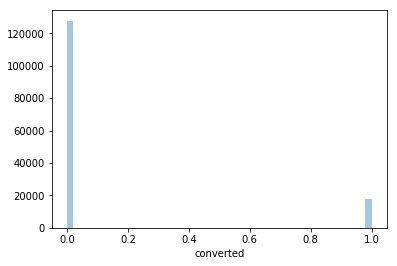

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


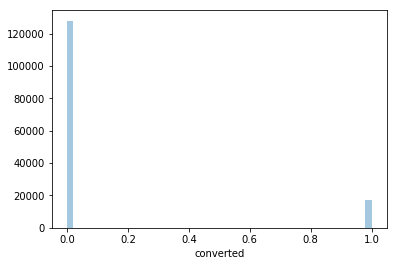

In [ ]:
sns.distplot(df_cont['converted'], kde=False)
plt.show()
sns.distplot(df_exp['converted'], kde=False)
plt.show()

In [ ]:
def get_cl_samp(data, size=100, iters=1000):
    res = []
    for i in range(iters):
        samp = np.random.choice(data, size=size)
        res.append(np.mean(samp))
    return res

In [ ]:
norm_cont = get_cl_samp(df_cont['converted'], size=15000, iters=500)
norm_exp = get_cl_samp(df_exp['converted'], size=15000, iters=500)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


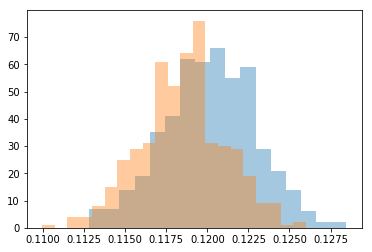

In [ ]:
sns.distplot(norm_cont, kde=False)
sns.distplot(norm_exp, kde=False)
plt.show()

In [ ]:
print(np.mean(norm_cont), np.mean(norm_exp))

0.12017093333333334 0.11849599999999999


In [ ]:
# alpha = 0.001

round(stats.ttest_ind(norm_exp, norm_cont)[1], 7)

0.0

# Derivatives

Let's explain on the charts:

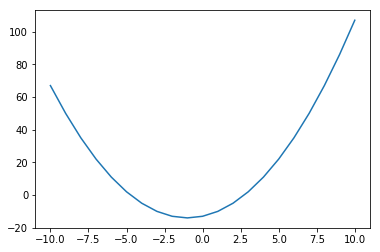

In [ ]:
x = list(range(-10, 11))
plt.plot(
    x,
    list(map(lambda x: x**2 + 2*x - 13, x))
)
plt.show()

### Polynomial derivative

$a*x^{2} + b*x + c$

Equals

$2*a*x + b$

### Graph of the derivative function

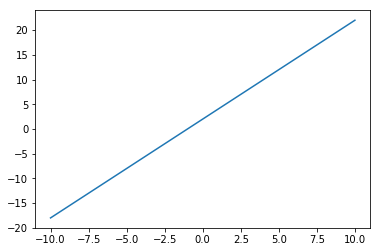

In [ ]:
plt.plot(list(range(-10, 11)), list(map(lambda x: 2*x + 2, range(-10, 11))))
plt.show()

### Why is this needed?

2 main purposes:

1. We can easily find a local minimum, maximum. Required if we want to find the optimal value of the function.
2. At every moment we understand what trend we have: the function is going down or, on the contrary, is increasing.

Example:

$y = -3x^2 + 2x + 1$

We want to understand for which $x$ the value of $y$ is maximum.

We find the derivative of the function.

$y' = -6x + 2$

Equate $y'$ to 0. We get the equation:

$-6x + 2 = 0$

The root of this equation is: $1/3$

**Total**: when the argument value is 1/3, the function takes the maximum value. Let's show it on the chart.

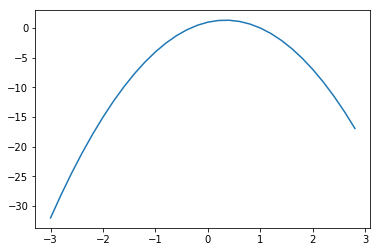

In [ ]:
plt.plot(list(np.arange(-3, 3, 0.2)),
         list(map(lambda x: -3*x**2 + 2*x + 1,
                  np.arange(-3, 3, 0.2))))
plt.show()

### Problem

Setting the derivative to 0 can help you find the local minimum-maximum, but not the global one!

In optimization problems, it is often required to find exactly the global minimum maximum, or get as close to it as possible.

# Likelihood function

The likelihood function is a function of the form $W(\alpha) = \sum\log p(y_i/x_i,\alpha)$. The maximum likelihood method consists in choosing the one from the set of models that maximizes the value of the likelihood function, i.e. the value of the parameter $\alpha^* = argmax_\alpha W(\alpha)$ is chosen.

**Maximum likelihood method** is a method of finding a model that best describes the training sample in some sense, obtained with some unknown distribution.

### Example

The number of dead cavalrymen in the report

number of dead number of reports (reports)
0                109  
1                65  
2                22  
3                3  
4                1  
5                0  

Modeling the number of deaths using **Poisson distribution**

About distribution separately

The probability that a random variable from the Poisson distribution will take a value equal to k is equal to:

$p(k)\equiv \mathbb {P} (Y=k)={\frac {\lambda ^{k}}{k!}}\,e^{-\lambda }$

But how to choose the unknown parameter $\lambda$ ?

The probability of obtaining exactly such a sample as above is equal to the product of the probability functions for each of the values of the random variable - this is the function of ** sampling likelihood **

In [ ]:
X = [0, 1, 2, 3, 4, 5]
Y = [109, 65, 22, 3, 1]

To do this, we need to find the derivative of the likelihood function

It is equal to:

<img src="2019-06-21 13.52.19-eq6jr.png" />

In [ ]:
Yi = [0 for i in range(109)] + [1 for i in range(65)] + \
[2 for i in range(22)] + [3 for i in range(3)] + [4]

In [ ]:
sum(Yi) / 200

0.61

In [ ]:
Yi = [109 * 0, 65 * 1, 22 * 2, 3 * 3, 1 * 4]
-200 + sum([l / 0.61 for l in lst])

0.0

In [ ]:
(109 * 0 + 65 * 1 + 22 * 2 + 3 * 3 + 1 * 4) / 200

0.61

In [ ]:
65 / 200

0.325

In [ ]:
import math

In [ ]:
0.61**2 / math.factorial(2) * np.e**(-0.61)

0.10109042919131069

In [ ]:
22/200

0.11

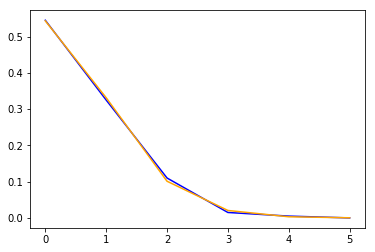

In [ ]:
K = [0, 1, 2, 3, 4, 5]
X = [109 / 200, 65 / 200, 22 / 200, 3 / 200, 1 / 200, 0]
Y = []

for k in K:
    Y.append(0.61**k / math.factorial(k) * np.e**(-0.61))

plt.plot(K, X, c='blue')
plt.plot(K, Y, c='orange')
plt.show()